# Module detection and segmentation

This is a quick tutorial showcasing the detection of solar module in EL images as well as segmentation into cells.

## Preparation

Enable auto completion 

In [6]:
%config IPCompleter.greedy=True

Now, we need to import two packages. The `data` packges offers demo datasets as well as routines for reading and writing images. The `preproc`-package implements detection and segmentation methods.

In [7]:
from pvinspect import data, preproc

## Detection

Let's now read two images from the demo sequences `scmos` and run the detection. You may instead use `.ingas()` for a different sequence or adapt the number of images to your needs.

In [8]:
imgs = data.demo.poly10x6(5)
imgs = preproc.locate_module_and_cells(imgs)

100%|██████████| 5/5 [00:01<00:00,  2.58it/s]


We can use the `.head()` method on any image sequence to show the first N images (4 by default). You may use an optional argument to show more/less, e.g. `.head(6)`.

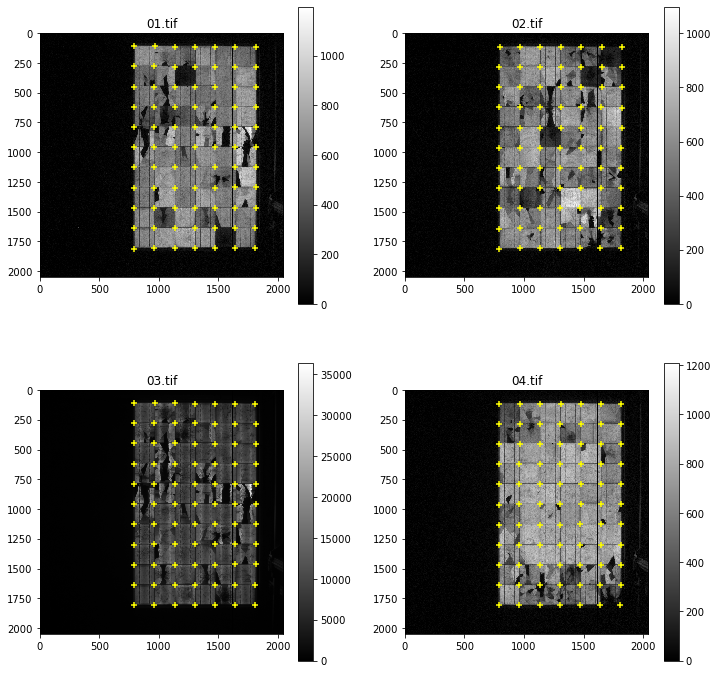

In [9]:
imgs.head()

## Segmentation

Now, lets compute a sequence of cell images and show the result:

100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


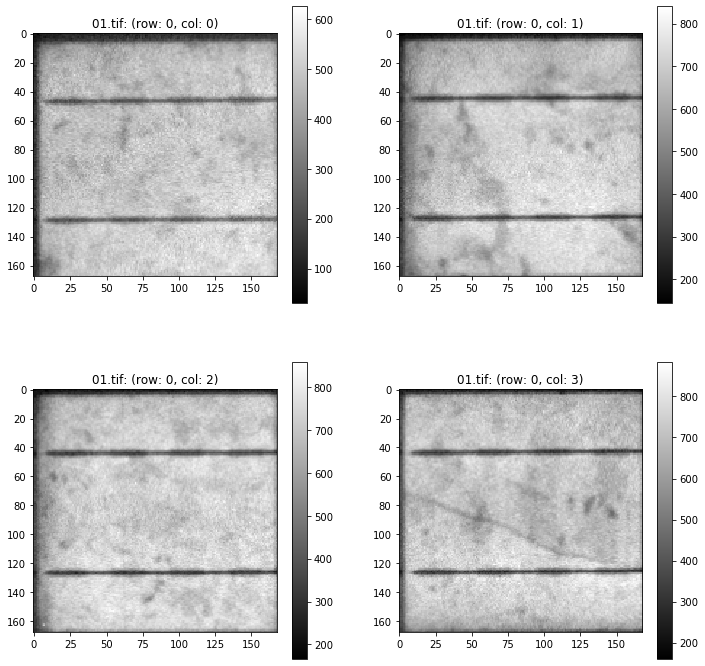

In [10]:
cells = preproc.segment_cells(imgs)
cells.head()

Our demo modules have 60 cells each. Hence, we obtain 300 cell images:

In [11]:
len(cells)

300

Finally, save the resulting cell images to a directory `results`:

In [12]:
data.save_images('results', cells)

100%|██████████| 300/300 [00:00<00:00, 623.70it/s]
